In [1]:
import pickle
import datetime as dt
import pandas as pd
import numpy as np
import glob, os
import re
import json
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###READING BIPOLAR DATA
bipolar_data = pd.read_pickle("/Users/tanjakemper/Documents/Bipolar Project/datasets/bipolar_data/bipolar_data_all_tweets.pkl", compression='infer')

In [3]:
bipolar_data.head(10)

,id,is_control,created_at,full_text
0,1039634572034678784,0,2018-11-17 02:29:33,"Sorry, didn't mean to rant."
1,1039634572034678784,0,2018-11-17 02:28:34,"Like, I had heart surgery but obviously my pri..."
2,1039634572034678784,0,2018-11-17 02:27:02,Tbh part of the reason for dropping out is tha...
3,1039634572034678784,0,2018-11-17 02:25:24,I've been talking with my case worker about go...
4,1039634572034678784,0,2018-11-17 02:23:17,Basically mental and physical stuff have made ...
5,1039634572034678784,0,2018-11-17 02:21:04,I've also been having a rough time with my men...
6,1039634572034678784,0,2018-11-17 02:19:28,Apologies for not posting much; at the beginni...
7,1039634572034678784,0,2018-09-15 00:34:01,Working on a walk cycle for Animation class ht...
8,1039634572034678784,0,2018-09-11 22:12:33,"And my current icon, my awkward fish boy, Curt..."
9,1039634572034678784,0,2018-09-11 22:11:51,"Take 2 of uploading my header image, one of my..."


In [4]:
bipolar_data.dtypes

id                    object
is_control             int64
created_at    datetime64[ns]
full_text             object
dtype: object

In [8]:
control_data = pd.read_pickle("/Users/tanjakemper/Documents/Bipolar Project/datasets/control_data/1/control_data_all_tweets.pkl", compression='infer')


In [9]:
control_data.head(10)

,id,is_control,created_at,full_text
0,185501402,1,2019-04-18 07:13:47,RT @menghanyurkan: let’s confuse kids nowadays...
1,185501402,1,2019-04-17 04:04:24,RT @awwe_: Ok PSI u got my vote. Good luck.
2,185501402,1,2019-03-31 17:33:40,RT @LFC: This TEAM 🔴🔴 https://t.co/MTfxRUnenK
3,185501402,1,2019-03-31 17:33:29,RT @LFC: Up the Reds 🙌🔴 https://t.co/1dLVql61sz
4,185501402,1,2019-03-31 17:32:51,"RT @LFCUSA: Boston, they can hear you all the ..."
5,185501402,1,2019-03-30 03:34:21,RT @BRGaming: FIFA legend @F2Tekkz keeps makin...
6,185501402,1,2018-04-13 11:43:15,RT @ASRomaEN: We’ll be opponents for 180 minut...
7,185501402,1,2016-05-18 11:52:16,new balance derby in final #YNWA
8,185501402,1,2016-03-20 15:12:03,yook liverpool :(
9,185501402,1,2016-02-11 15:21:40,"@bintangbete ge,kemal,ernest,boy willian #Comi..."


In [10]:
control_data.dtypes

id                    object
is_control             int64
created_at    datetime64[ns]
full_text             object
dtype: object

In [11]:
###ADDITIONAL COLUMNS: HOUR AND MINUTE
bipolar_data['hour'] = pd.to_datetime(bipolar_data['created_at'], format='%H:%M').dt.hour
bipolar_data['minute'] = pd.to_datetime(bipolar_data['created_at'], format='%H:%M').dt.minute
control_data['hour'] = pd.to_datetime(control_data['created_at'], format='%H:%M').dt.hour
control_data['minute'] = pd.to_datetime(control_data['created_at'], format='%H:%M').dt.minute
bipolar_data.sample(5, random_state=0)
control_data.sample(5, random_state=0)

,id,is_control,created_at,full_text,hour,minute
2952528,302854411,1,2019-02-18 19:12:44,@RoyalKenyah My Strawberry will come and say i...,19,12
1640827,1728285067,1,2018-01-29 12:03:56,I wish I wasn't broke so I could play monster ...,12,3
2077996,545010449,1,2013-09-16 11:16:08,The longest river in the world is the Nile Riv...,11,16
2934199,541157654,1,2015-02-18 22:16:29,@matthewmcvey Yea that's cool,22,16
2637216,63323676,1,2017-05-22 19:32:13,RT @TeamRocket: Retweet if you find Ditto http...,19,32


In [12]:
###SET DATE AS AN INDEX
bipolar_data = bipolar_data.set_index('created_at')
bipolar_data.sample(5, random_state=0)
control_data = control_data.set_index('created_at')

In [13]:
bipolar_data['hourminute'] = bipolar_data.hour + bipolar_data.minute/60
control_data['hourminute'] = control_data.hour + control_data.minute/60

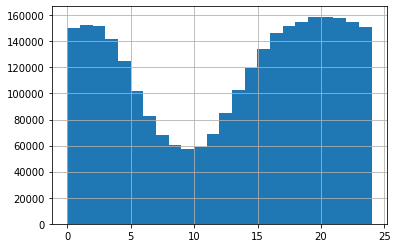

In [14]:
bipolar_data.hourminute.hist(bins=24)

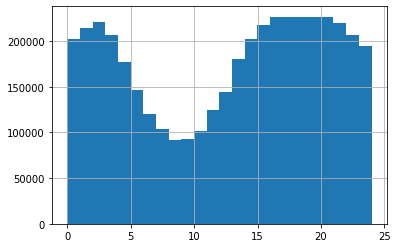

In [15]:
control_data.hourminute.hist(bins=24)

In [16]:
bipolar_data.size

17372178

In [17]:
control_data.size

25809816

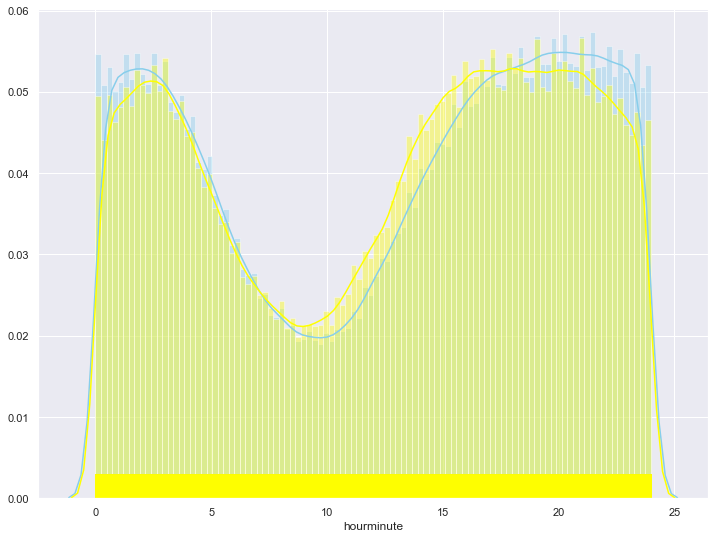

In [23]:
sns.distplot( bipolar_data['hourminute'] , color="skyblue", bins = 100, label="Bipolar Group")
sns.distplot( control_data["hourminute"] , color="yellow", bins = 100, label="Control Group", rug = True, rug_kws={"alpha":0.5})
sns.set(rc={'figure.figsize':(12, 18)})


In [22]:
from scipy import stats
stats.ks_2samp(bipolar_data['hourminute'],control_data['hourminute'])

Ks_2sampResult(statistic=0.02099769021537823, pvalue=0.0)